# DATA MINING

# ESPECIALIZACION EN DATA SCIENCE

# ULISES JOSÉ BUSTAMANTE MORA

## INTRODUCCION

El presente trabajo tiene como objetivo analizar y pronosticar cambios en la migración de Nueva Zelanda, mediante el uso de datos históricos de dicho país para poder resolver el presente ejercicio con el fin de demostrar el gran valor que ofrecen las técnicas de minería de datos aplicados a temas económicos.

### Librerias a utilizar

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Carga del conjunto de datos

In [2]:
df = pd.read_csv("migration_nz 2.0.csv")
df

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
...,...,...,...,...,...
86521,Net,Not stated,Australian Citizen,2016,80.0
86522,Net,Not stated,Total All Citizenships,2016,3177.0
86523,Net,All countries,New Zealand Citizen,2016,-1818.0
86524,Net,All countries,Australian Citizen,2016,3487.0


# Comprensión de datos

### Número total de entradas y de datos faltantes y de tipos de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


### Valores únicos en la columna de Measure

In [4]:
df["Measure"].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

### Valores únicos en la columna de Citizenship

In [5]:
df["Citizenship"].unique()

array(['New Zealand Citizen', 'Australian Citizen',
       'Total All Citizenships'], dtype=object)

### Valores únicos en la columna de Year

In [6]:
df["Year"].unique()

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1994, 1992, 1993, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2016, 2015], dtype=int64)

### Valores únicos en la columna de Country

In [7]:
df["Country"].unique()

array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

# Preparación de datos

### Checando si hay datos faltantes

In [8]:
df.isnull().any()

Measure        False
Country        False
Citizenship    False
Year           False
Value           True
dtype: bool

### Se crea un filtro para separar las entradas que tienen datos faltantes

In [9]:
ISNULLfiltro = df["Value"].isnull()
df[ISNULLfiltro].head()

,Measure,Country,Citizenship,Year,Value
68535,Arrivals,Czechoslovakia,New Zealand Citizen,2009,NaN
68536,Arrivals,Czechoslovakia,Australian Citizen,2009,NaN
68537,Arrivals,Czechoslovakia,Total All Citizenships,2009,NaN
69294,Departures,Czechoslovakia,New Zealand Citizen,2009,NaN
69295,Departures,Czechoslovakia,Australian Citizen,2009,NaN


### Se cambia el valor NaN por la mediana de la columna y se comprueba que no hayan más.

In [10]:
mediana = df["Value"].median()

df["Value"].fillna(mediana, inplace=True)

In [11]:
df.isnull().any()

Measure        False
Country        False
Citizenship    False
Year           False
Value          False
dtype: bool

### Eliminacion de valores donde el Value es 0. Esto ya que como no se registraron personas, no nos sirve para el analisis

In [12]:
zeroFilter = (df["Value"] > 10000)
df = df[zeroFilter]
df

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
11,Arrivals,Australia,Total All Citizenships,1979,13037.0
200,Arrivals,Europe,Total All Citizenships,1979,11452.0
756,Arrivals,All countries,New Zealand Citizen,1979,21445.0
...,...,...,...,...,...
85767,Departures,All countries,Total All Citizenships,2016,56717.0
85860,Net,Asia,Total All Citizenships,2016,34658.0
85881,Net,China,Total All Citizenships,2016,10310.0
85967,Net,Europe,Total All Citizenships,2016,15752.0


### Creación de una muestra de la población por la cantidad de entradas. La muestra es del 50%

In [13]:
muestra_aleatoria = df.sample(frac=0.5, random_state=101)
muestra_aleatoria.head()

,Measure,Country,Citizenship,Year,Value
36632,Arrivals,Europe,Total All Citizenships,1995,19608.0
79136,Net,Europe,Total All Citizenships,2013,13311.0
59201,Net,All countries,Total All Citizenships,2004,15108.0
63956,Arrivals,Europe,Total All Citizenships,2007,26888.0
35765,Net,Asia,Total All Citizenships,1994,14580.0


### Notar si se presentan valores atipicos por histograma

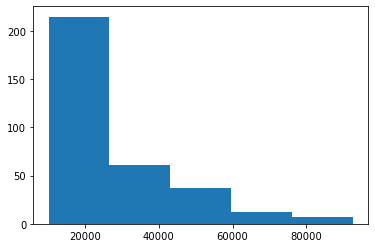

In [14]:
plt.hist(muestra_aleatoria["Value"], bins=5)
plt.show()

### Boxplot para ver si hay datos atipicos

<AxesSubplot:xlabel='Value', ylabel='Measure'>

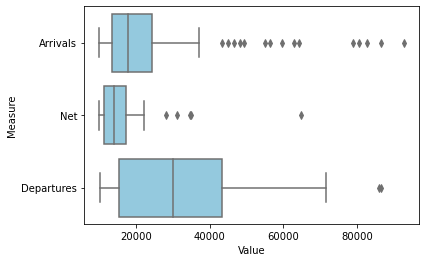

In [15]:
sns.boxplot(x=muestra_aleatoria["Value"], y = muestra_aleatoria["Measure"], color='skyblue')

### Violinplot para confirmar la presencia de valores atipicos

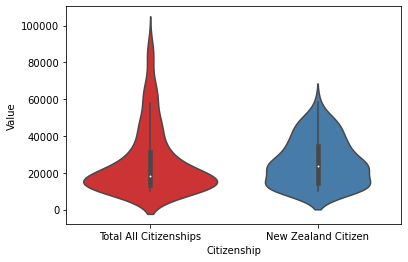

In [16]:
sns.violinplot(x="Citizenship", y="Value", data=muestra_aleatoria,split=True,palette='Set1')
plt.show()

# Modelado de Datos

### Medidas de tendencia y de disperción

In [17]:
muestra_aleatoria.describe()["Value"]

count      332.000000
mean     26047.695783
std      16715.805625
min      10042.000000
25%      13884.000000
50%      19762.000000
75%      33866.500000
max      92660.000000
Name: Value, dtype: float64

### Obteniendo la moda de cada variable

In [18]:
muestra_aleatoria.mode()

,Measure,Country,Citizenship,Year,Value
0,Departures,All countries,Total All Citizenships,2004.0,10816.0
1,NaN,NaN,NaN,NaN,13938.0
2,NaN,NaN,NaN,NaN,19608.0
3,NaN,NaN,NaN,NaN,28981.0


### Cálculo de la mediana

In [19]:
muestra_aleatoria["Value"].median()

19762.0

### La varianza de las variables númericas

In [20]:
muestra_aleatoria["Value"].var()

279418157.68662894

### La asimetria de las variables númerica

In [21]:
muestra_aleatoria["Value"].skew()

1.5440470649225888

### Cálculo del coeficiente de variación

In [22]:
muestra_aleatoria["Value"].std() / muestra_aleatoria["Value"].mean()

0.641738361964457

### Curtosis del conjunto de datos

In [23]:
muestra_aleatoria["Value"].kurtosis()

2.226532616233525

### Agrupacion de la suma de personas, segmentada por la ciudadania y tipo de vuelo

In [24]:
muestra_aleatoria.pivot_table(values = "Value", index= "Citizenship", columns = "Measure", aggfunc = sum)

Measure,Arrivals,Departures,Net
Citizenship,,,
New Zealand Citizen,729662.0,2011762.0,NaN
Total All Citizenships,2661622.0,2787060.0,457729.0


### Conteo de entradas por nacionalidad

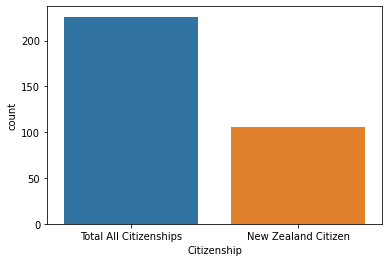

In [25]:
sns.countplot(x='Citizenship',data=muestra_aleatoria)
plt.show()

In [26]:
CitiGroupBy = muestra_aleatoria.groupby("Citizenship")["Value"].count()
CitiGroupBy = pd.DataFrame(CitiGroupBy).reset_index()
CitiGroupBy.head()

,Citizenship,Value
0,New Zealand Citizen,106
1,Total All Citizenships,226


### Conteo de entradas por modo de vuelo

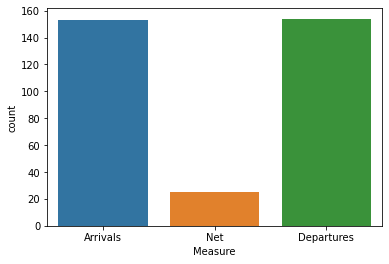

In [27]:
sns.countplot(x='Measure',data=muestra_aleatoria)
plt.show()

In [28]:
MeasureGroupBy = muestra_aleatoria.groupby("Measure")["Value"].count()
MeasureGroupBy = pd.DataFrame(MeasureGroupBy).reset_index()
MeasureGroupBy.head()

,Measure,Value
0,Arrivals,153
1,Departures,154
2,Net,25


### Paises mas comunes

<AxesSubplot:xlabel='Country'>

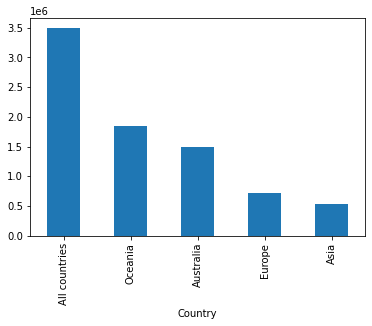

In [29]:
top_10_paises = muestra_aleatoria.groupby("Country")["Value"].sum().sort_values(ascending=False).head(5)
top_10_paises.plot(kind="bar")

### Scatterplot para notar algun tipo de correlación

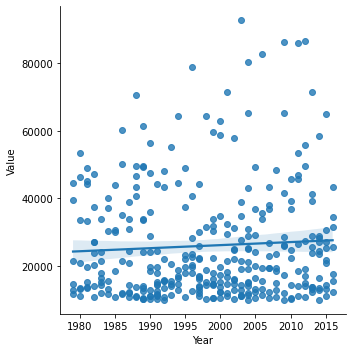

In [30]:
sns.lmplot(x='Year',y='Value',data=muestra_aleatoria)

### Scatterplot segmentado por ciudadania

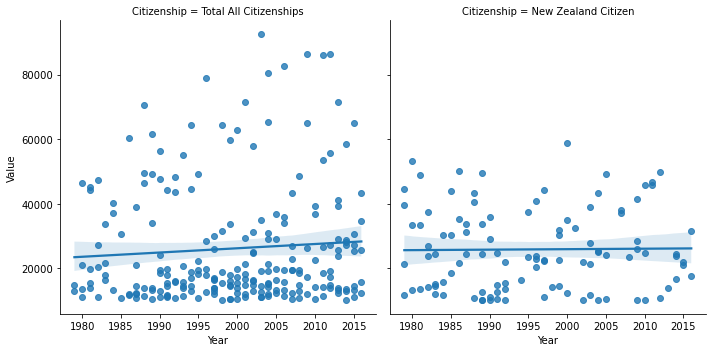

In [31]:
sns.lmplot(x='Year',y='Value',data=muestra_aleatoria,col = "Citizenship")

### Agrupacion por año para saber la suma de sus valores

In [32]:
YearGroupBy = muestra_aleatoria.groupby("Year")["Value"].sum()
YearGroupBy = pd.DataFrame(YearGroupBy).reset_index()
YearGroupBy.head()

,Year,Value
0,1979,145128.0
1,1980,192047.0
2,1981,234329.0
3,1982,208668.0
4,1983,156029.0


### Lineplot

Text(0.5, 1.0, 'Line Chart of Value over Time')

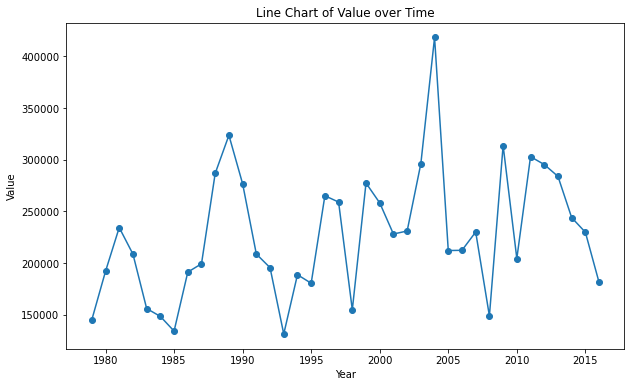

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(YearGroupBy["Year"], YearGroupBy["Value"], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Value over Time')

## Preparación del dataset para un futuro algoritmo de Machine Learning

### Creacion de dummies para las variables categoricas

In [34]:
dummies = pd.get_dummies(df['Measure'], drop_first=True)

df_ml = pd.concat([df, dummies], axis=1)
df_ml.head()

df_ml.to_csv('df_ml.csv', index=False)

### Preparación del dataset para entrenar y evaluar el modelo

In [35]:
from sklearn.model_selection import train_test_split

X = df_ml[["Year", "Departures", "Net" ]]
y = df_ml["Value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101) 

### Datasets listos

In [36]:
X_train.head()

,Year,Departures,Net
85006,2016,0,0
4554,1981,0,0
52571,2002,0,0
27326,1991,0,0
59963,2005,1,0


In [37]:
y_train.head()

85006    31671.0
4554     13456.0
52571    24685.0
27326    18006.0
59963    36817.0
Name: Value, dtype: float64